# Imports

In [55]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score



# Data Visualization

In [78]:
# Importing Data
data = pd.read_csv('/content/hw1.csv')
data.dropna(inplace=True)
data.head()

1000
1000


,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


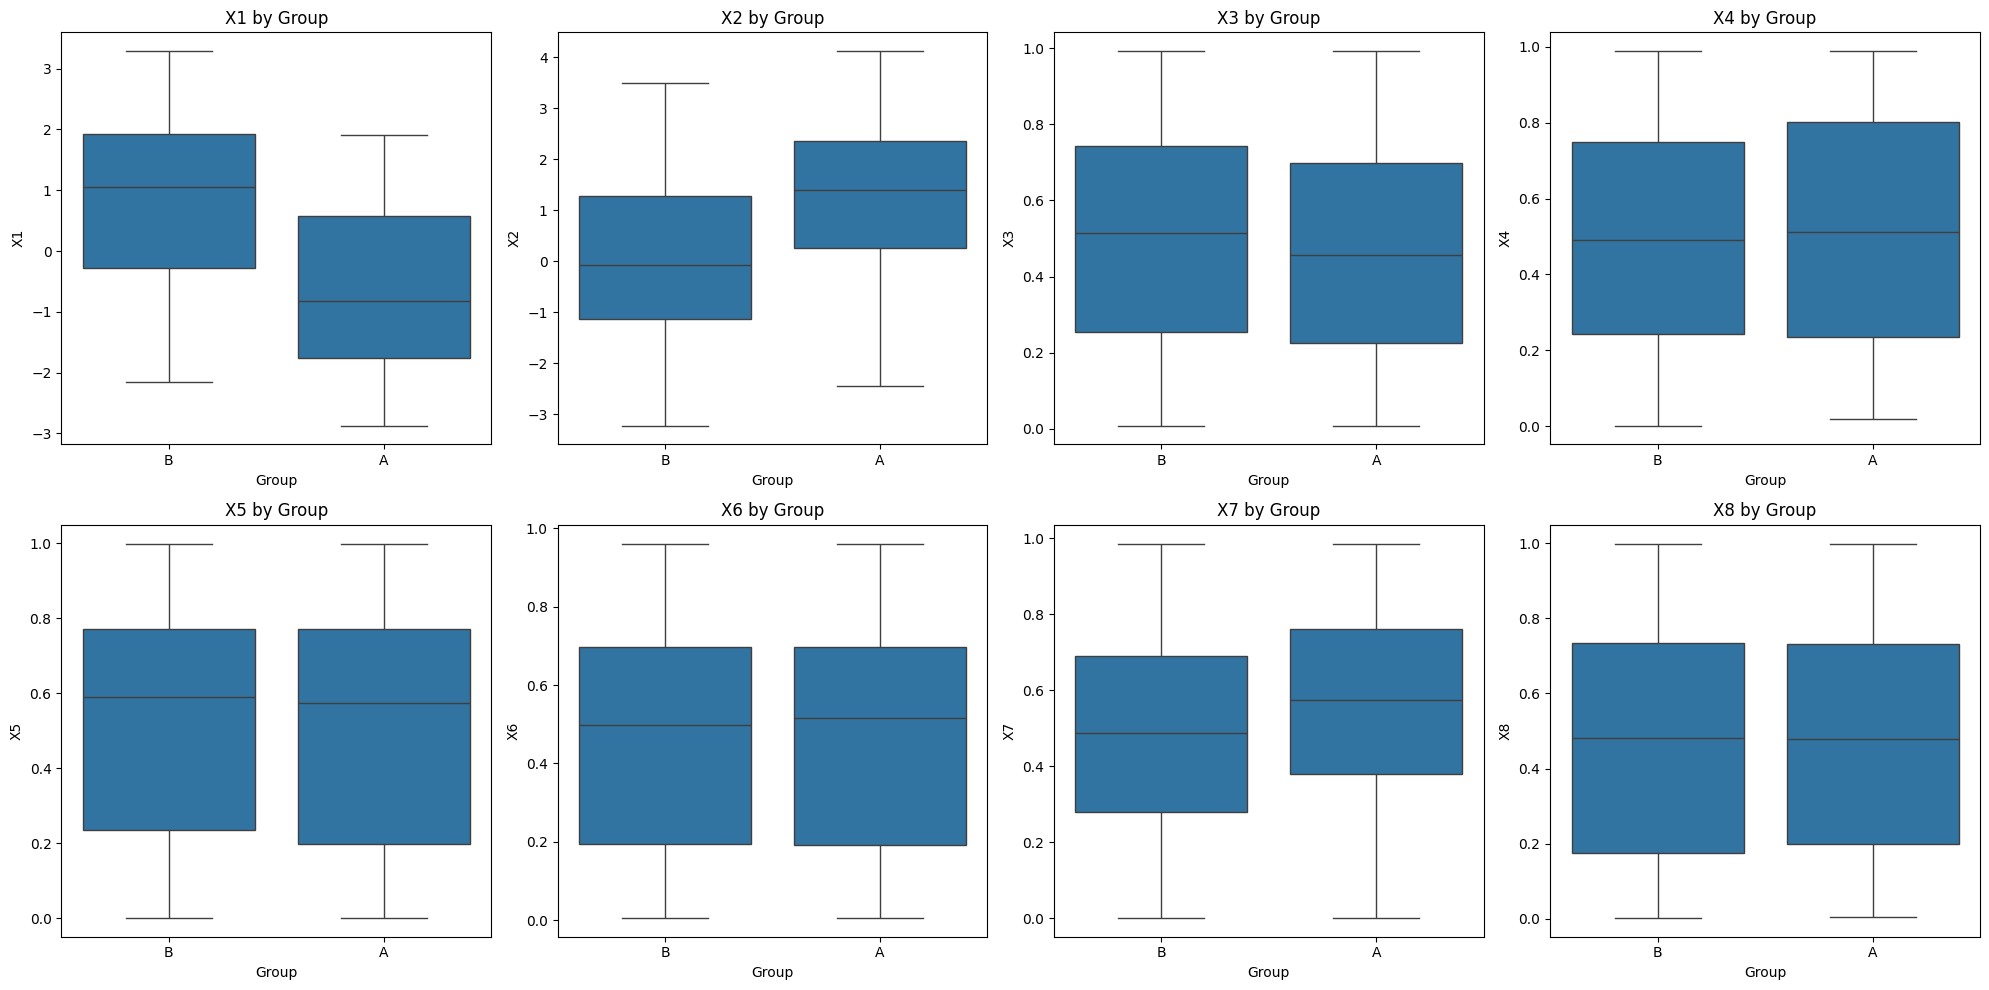

In [75]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data, x='Group', y=column, ax=axes[i])
    axes[i].set_xlabel('Group')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column} by Group')

plt.tight_layout()
plt.show()

# Preprocessing

In [57]:
# Preprocessing
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
X = data[predictors]
y = data['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
# model
column_transformer = make_column_transformer((StandardScaler(), slice(0, -1)),
                                              remainder="passthrough")

# SVC

In [85]:
model = SVC(probability=True)

pipeline = make_pipeline(column_transformer, model)

In [86]:
# Gridsearch hyperparameters for model
param_grid = {'svc__C': [0.001, 0.01, 1, 5, 25, 50],
              'svc__gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
              'svc__kernel': ['linear', 'rbf']}

SVC_pipeline = GridSearchCV(pipeline, param_grid, cv = 5, scoring = "accuracy", n_jobs=-1)

SVC_pipeline.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         slice(0, -1, None))])),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 1, 5, 25, 50],
                         'svc__gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [87]:
# Best Hyperparameters
SVC_pipeline.best_params_

{'svc__C': 25, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [88]:
# prediction based on best model
best_model = SVC_pipeline.best_estimator_

y_pred_train_SVC = best_model.predict(X_train)
y_pred_test_SVC = best_model.predict(X_test)

y_pred_train_prob_SVC = best_model.predict_proba(X_train)[:, 1]
y_pred_test_prob_SVC = best_model.predict_proba(X_test)[:, 1]


# Assess
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train_SVC))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob_SVC))

print("Test Accuracy: ", accuracy_score(y_test, y_pred_test_SVC))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob_SVC))


Train Accuracy:  0.8975
Train ROC AUC:  0.967957794285936
Test Accuracy:  0.75
Test ROC AUC:  0.8178856662463219


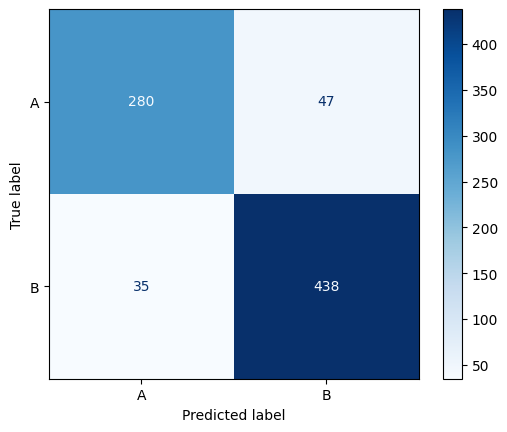

In [89]:
cm =  confusion_matrix(y_train, y_pred_train_SVC)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("SVC Training Confusion Matrix")
plt.show()

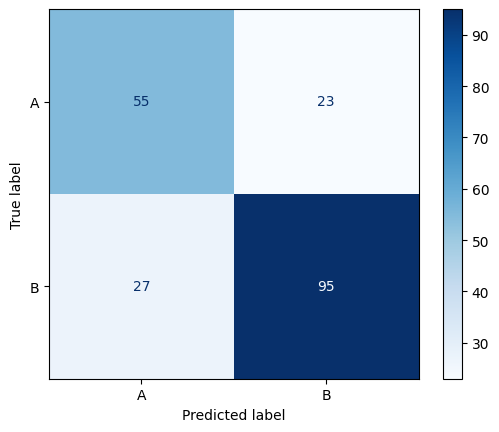

In [90]:
cm =  confusion_matrix(y_test, y_pred_test_SVC)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("SVC Testing Confusion Matrix")
plt.show()

# Linear Regression

In [64]:
# Model
lr = LogisticRegression()
LogitisticPipe = make_pipeline(column_transformer, lr)

# fit
LogitisticPipe.fit(X_train, y_train)

# predict
y_pred_train_LR = LogitisticPipe.predict(X_train)
y_pred_test_LR = LogitisticPipe.predict(X_test)

y_pred_train_prob_LR = LogitisticPipe.predict_proba(X_train)[:, 1]
y_pred_test_prob_LR = LogitisticPipe.predict_proba(X_test)[:, 1]


# Assess
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train_LR))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob_LR))


print("Test Accuracy: ", accuracy_score(y_test, y_pred_test_LR))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob_LR))

Train Accuracy:  0.7625
Train ROC AUC:  0.8414117707909046
Test Accuracy:  0.765
Test ROC AUC:  0.855191256830601


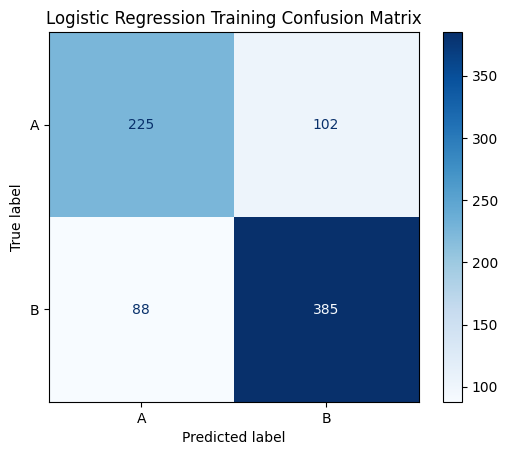

In [92]:
# Train Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train_LR), display_labels=LogitisticPipe.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("Logistic Regression Training Confusion Matrix")
plt.show()

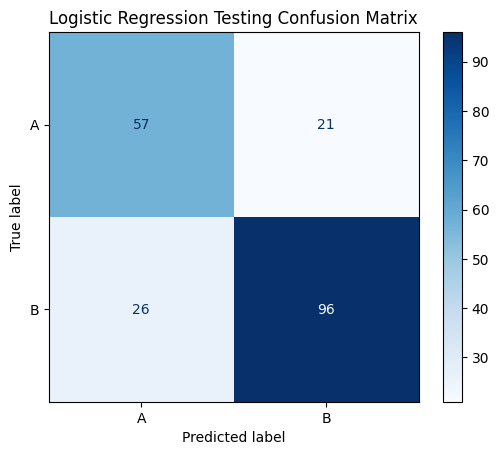

In [93]:
# Test Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test_LR), display_labels=LogitisticPipe.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("Logistic Regression Testing Confusion Matrix")
plt.show()

# KNearest Neighbors

In [79]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(column_transformer, knn)

knn_grid = GridSearchCV(knn_pipe, param_grid={"kneighborsclassifier__n_neighbors": [1, 2, 3, 5, 10, 15, 20]}, scoring="accuracy", cv=5, refit=True)
knn_grid.fit(X_train, y_train)

best_k = knn_grid.best_params_["kneighborsclassifier__n_neighbors"]
print(f'Best k value: {best_k}')
best_knn = knn_grid.best_estimator_

# predict
y_pred_train_KNN = best_knn.predict(X_train)
y_pred_test_KNN = best_knn.predict(X_test)

y_pred_train_prob_KNN = best_knn.predict_proba(X_train)[:, 1]
y_pred_test_prob_KNN = best_knn.predict_proba(X_test)[:, 1]

# assess
print("Train Acc: ", accuracy_score(y_train, y_pred_train_KNN))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob_KNN))

print("Test Acc: ", accuracy_score(y_test, y_pred_test_KNN))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob_KNN))

Best k value: 5
Train Acc:  0.8325
Train ROC AUC:  0.9093980125556826
Test Acc:  0.74
Test ROC AUC:  0.7969209751996637


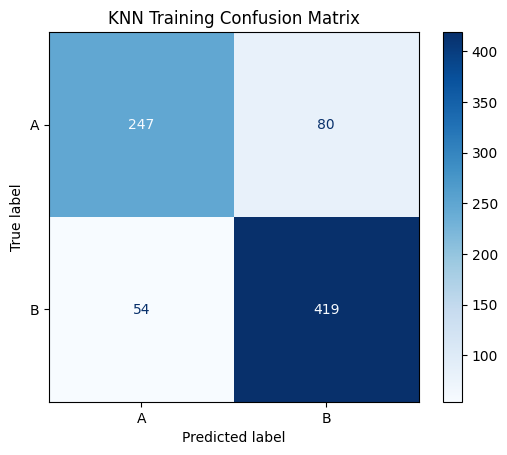

In [94]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred_train_KNN), display_labels=best_knn.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("KNN Training Confusion Matrix")
plt.show()

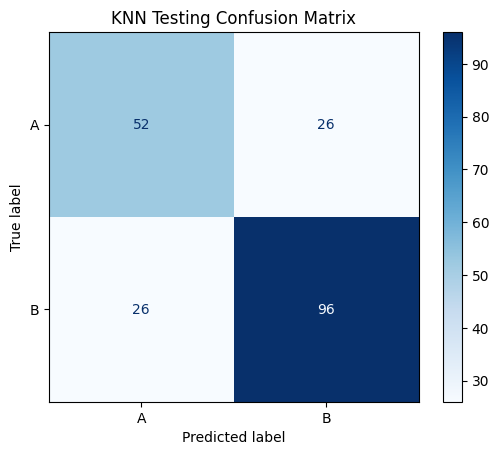

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_test_KNN), display_labels=best_knn.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title("KNN Testing Confusion Matrix")
plt.show()